In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv("testsubmission.csv")
print(test_data.head())

   day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
0   -2          0  AMETHYSTS        10002             1       9996.0   
1   -2          0  STARFRUIT         5002             1       4997.0   
2   -2        100  AMETHYSTS         9996             2       9995.0   
3   -2        100  STARFRUIT         4997            24          NaN   
4   -2        200  STARFRUIT         4997             2       4996.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           2.0       9995.0          29.0        10004             2   
1          31.0          NaN           NaN         5003            31   
2          22.0          NaN           NaN        10004             2   
3           NaN          NaN           NaN         5003             2   
4          20.0          NaN           NaN         5003            20   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0      10005.0          29.0          NaN           NaN   

In [14]:
pd.set_option('display.max_rows', None)

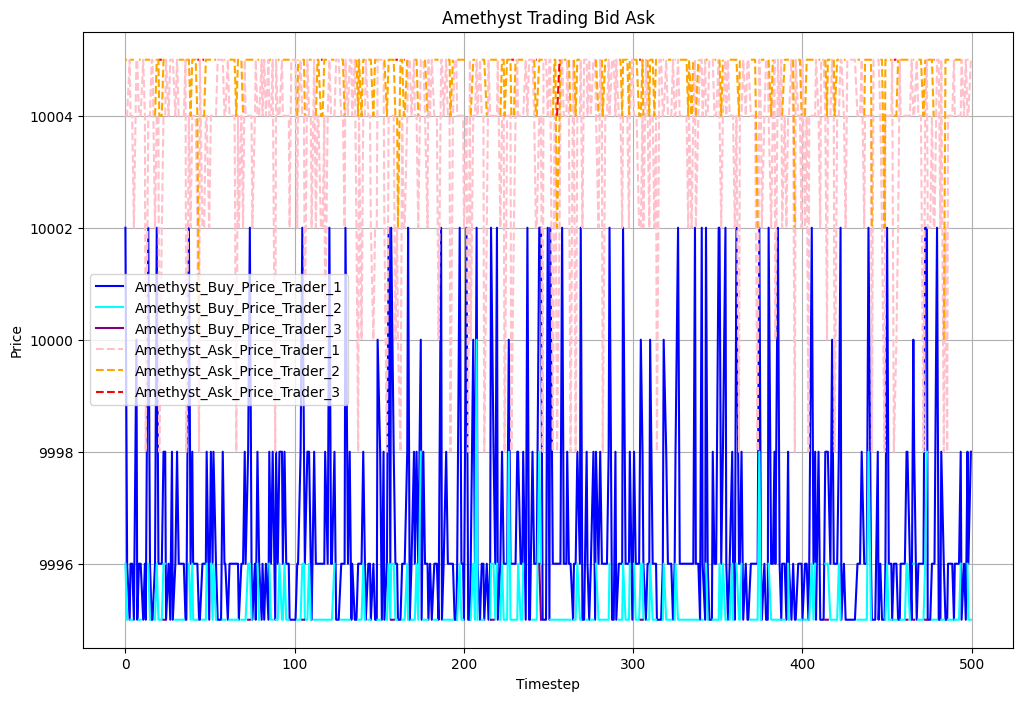

In [54]:
# plot the bid and ask for each trader for amethyst and starfruit
amethyst_data = test_data[test_data['product'] == "AMETHYSTS"]
#print(amethyst_data['bid_price_1'])
starfuit_data = test_data[test_data['product'] == "STARFRUIT"]

amethyst_data_plotting = amethyst_data[:500]

plt.figure(figsize=(12, 8))
plt.plot(amethyst_data_plotting.index / 2, amethyst_data_plotting['bid_price_1'], label="Amethyst_Buy_Price_Trader_1", color="blue")
plt.plot(amethyst_data_plotting.index / 2, amethyst_data_plotting['bid_price_2'], label="Amethyst_Buy_Price_Trader_2", color="cyan")
plt.plot(amethyst_data_plotting.index / 2, amethyst_data_plotting['bid_price_3'], label="Amethyst_Buy_Price_Trader_3", color="purple")

plt.plot(amethyst_data_plotting.index / 2, amethyst_data_plotting['ask_price_1'], label="Amethyst_Ask_Price_Trader_1", color="pink", linestyle="dashed")
plt.plot(amethyst_data_plotting.index / 2, amethyst_data_plotting['ask_price_2'], label="Amethyst_Ask_Price_Trader_2", color="orange", linestyle="dashed")
plt.plot(amethyst_data_plotting.index / 2, amethyst_data_plotting['ask_price_3'], label="Amethyst_Ask_Price_Trader_3", color="red",linestyle="dashed")

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Timestep')
plt.ylabel('Price')
plt.title('Amethyst Trading Bid Ask')
plt.legend()
plt.grid(True)
plt.show()

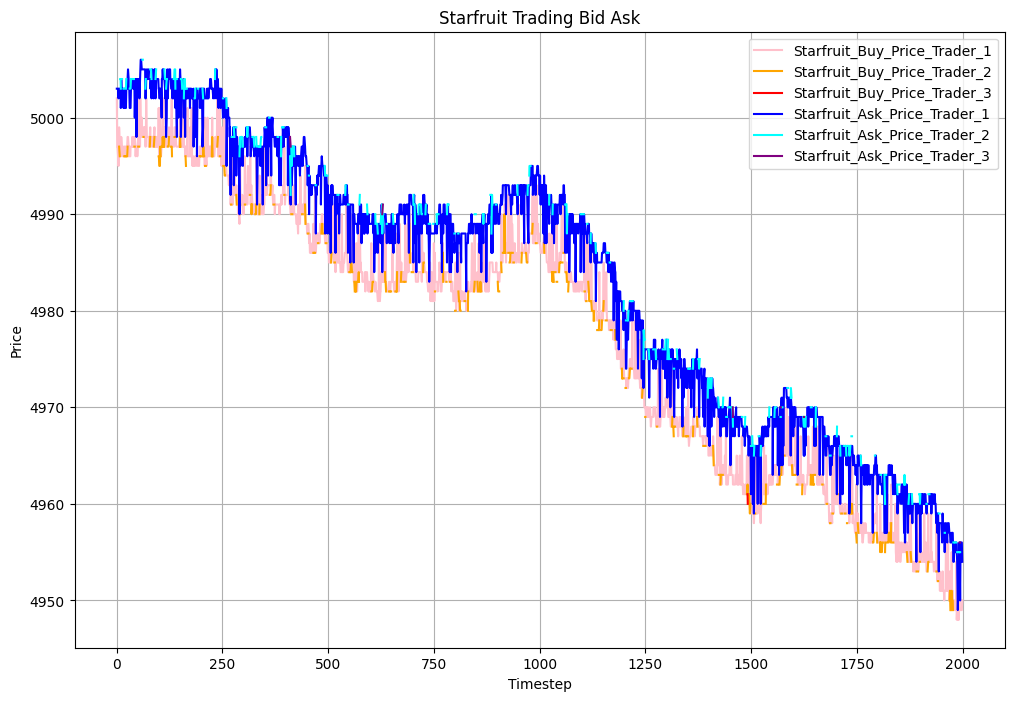

In [52]:
starfuit_data_plotting = starfuit_data

plt.figure(figsize=(12, 8))
plt.plot(starfuit_data_plotting.index / 2, starfuit_data_plotting['bid_price_1'], label="Starfruit_Buy_Price_Trader_1", color="pink")
plt.plot(starfuit_data_plotting.index / 2, starfuit_data_plotting['bid_price_2'], label="Starfruit_Buy_Price_Trader_2", color="orange")
plt.plot(starfuit_data_plotting.index / 2, starfuit_data_plotting['bid_price_3'], label="Starfruit_Buy_Price_Trader_3", color="red")

plt.plot(starfuit_data_plotting.index / 2, starfuit_data_plotting['ask_price_1'], label="Starfruit_Ask_Price_Trader_1", color="blue")
plt.plot(starfuit_data_plotting.index / 2, starfuit_data_plotting['ask_price_2'], label="Starfruit_Ask_Price_Trader_2", color="cyan")
plt.plot(starfuit_data_plotting.index / 2, starfuit_data_plotting['ask_price_3'], label="Starfruit_Ask_Price_Trader_3", color="purple")

# Loop through each combination of bid and ask prices for different traders.
for bid_trader in range(1, 4):
    for ask_trader in range(1, 4):
        # Ignore the cases where bid_trader is the same as ask_trader
        if bid_trader != ask_trader:
            # Identify trade signals: where bid price of one trader is higher than the ask price of another.
            trade_signals = starfuit_data_plotting[
                starfuit_data_plotting[f'bid_price_{bid_trader}'] >= starfuit_data_plotting[f'ask_price_{ask_trader}']
            ]

            # If there are trade signals, plot them.
            if not trade_signals.empty:
                print(True)
                # Plot buy signals where the bid is higher.
                plt.scatter(trade_signals.index / 2, trade_signals[f'bid_price_{bid_trader}'],
                            label=f"Trade Signal: Trader {bid_trader} Buy, Trader {ask_trader} Sell", 
                            alpha=0.7, edgecolors='w', s=50)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Timestep')
plt.ylabel('Price')
plt.title('Starfruit Trading Bid Ask')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
class Trader:
    """
    Contains the bid,ask orders for one trader over the trading period.
    """

    def __init__(self, bid_price, bid_volume, ask_price, ask_volume ) -> None:
        self.bid_price = bid_price
        self.bid_volume = bid_volume
        self.ask_price = ask_price
        self.ask_volume = ask_volume

In [7]:
trader_1 = Trader(amethyst_data["bid_price_1"], amethyst_data["bid_volume_1"],amethyst_data["ask_price_1"], amethyst_data["ask_volume_1"])